# Talib 套件： 金融領域的指標套件

### 賴志宏

建檔日期：2020.08.11  最後修改日期：2022.01.06

## 安裝 ta-lib 套件
* 影音教學：https://www.youtube.com/watch?v=EDemyRWImWo
* 可參考 http://yhhuang1966.blogspot.com/2018/05/python-ta-lib.html
* https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a

### 步驟一：查看python的版本
* 套件名稱 -V
* 套件名稱 --version
    * !python -V

### 步驟二：Talib 套件安裝
*　從以下網站下載合適的版本到目前使用的資料夾（例如：C:\使用者）:
   https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib
        
* 用anaconda prompt 安裝：
    * pip install 下載下來的檔案名稱
    * !pip install TA_Lib‑0.4.18‑cp37‑cp37m‑win_amd64.whl （在jupyter notebook中使用）
    

In [4]:
!brew install ta-lib

Running `brew update --preinstall`...
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
arkade                                   mold
bash-language-server                     nerdctl
ctlptl                                   rune
dtm                                      seaweedfs
etcd-cpp-apiv3                           sniffer
fnt                                      solargraph
fprettify                                sqlfluff
fypp                                     teku
grafana-agent                            yaml-language-server
ivtools                                  zbctl
libgrape-lite                            zsh-fast-syntax-highlighting
lighthouse
==> Updated Formulae
Updated 677 formulae.
==> Renamed Formulae
mr2 -> zoro
==> Deleted Formulae
appledoc            exomizer            hardlink-osx        whohas

To reinstall 0.4.0, run:
  brew reinstall ta-lib


In [2]:
!pip install TA_Lib-0.4.23-cp38-cp38-win_amd64.whl

## talib 模組簡介


### talib 函式分類
* Function API
    * 依照其功能來決定輸入值，因此不同函式的輸入值可能不同
* Abstract API
    * 皆採用相同的輸入值，即股票的開盤、收盤、最高、最低、成交量等資料
    * 輸入資料格式
        * 字典（字典的value為numpy的ndarray型別）
        * pandas的dataframes型別


### 使用字典格式的輸入範例

In [ ]:
### Abstract API 使用方式：
* 函式呼叫：傳入值為字典（dictionary)的格式，字典的value為numpy的array型別
    * TAKBar['date'] = np.array([line[0] for line in SData])
    * TAKBar['open'] = np.array([line[1] for line in SData])
    * TAKBar['high'] = np.array([line[2] for line in SData])
    * TAKBar['low'] = np.array([line[3] for line in SData])
    * TAKBar['close'] = np.array([line[4] for line in SData])
    * TAKBar['volume'] = np.array([line[5] for line in SData])  
    
          
    * MAvalue = abstract.SMA(TAKBar) # 呼叫MA函式
    
    * 傳入的字典的內容可以依照需要，輸入使用到的key，例如移動平均線MA只需要使用到日期和收盤價，則只要傳入日期time和收盤價close等兩個key即可
    * 傳入值也可以是float或是double格式的list

In [8]:
# 製作talib所需要的資料格式：dictionary

def GetStock(file_name):
    from datetime import datetime

    SData = open(file_name).readlines()
    MData = [ line.strip('\n').split(',') for line in SData ]   # 去掉換行

    SData2 = [[datetime.strptime(line[0], '%Y/%m/%d').date(), float(line[1]), float(line[2]), \
           float(line[3]), float(line[4]), int(line[5])] for line in MData[3: ] ]
    return SData2

import numpy as np

SData = GetStock('pd_TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料
TAKBar = {}
TAKBar['date'] = np.array([line[0] for line in SData])
TAKBar['open'] = np.array([line[1] for line in SData])
TAKBar['high'] = np.array([line[2] for line in SData])
TAKBar['low'] = np.array([line[3] for line in SData])
TAKBar['close'] = np.array([line[4] for line in SData])
TAKBar['volume'] = np.array([line[5] for line in SData])
print(TAKBar)


{'date': array([datetime.date(2020, 1, 2), datetime.date(2020, 1, 3),
       datetime.date(2020, 1, 6), datetime.date(2020, 1, 7),
       datetime.date(2020, 1, 8), datetime.date(2020, 1, 9),
       datetime.date(2020, 1, 10), datetime.date(2020, 1, 13),
       datetime.date(2020, 1, 14), datetime.date(2020, 1, 15),
       datetime.date(2020, 1, 16), datetime.date(2020, 1, 17),
       datetime.date(2020, 1, 20), datetime.date(2020, 1, 30),
       datetime.date(2020, 1, 31), datetime.date(2020, 2, 3),
       datetime.date(2020, 2, 4), datetime.date(2020, 2, 5),
       datetime.date(2020, 2, 6), datetime.date(2020, 2, 7),
       datetime.date(2020, 2, 10), datetime.date(2020, 2, 11),
       datetime.date(2020, 2, 12), datetime.date(2020, 2, 13),
       datetime.date(2020, 2, 14), datetime.date(2020, 2, 17),
       datetime.date(2020, 2, 18), datetime.date(2020, 2, 19),
       datetime.date(2020, 2, 20), datetime.date(2020, 2, 21),
       datetime.date(2020, 2, 24), datetime.date(2020, 2,

In [17]:
# 上例改為函式

def GetStock_dic(file_name):
    import numpy as np

    SData = GetStock(file_name)
    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock

In [18]:
# 移動平均值 SMA

stock = GetStock_dic('pd_TEJ2330.csv')
from talib import abstract
MAvalue = abstract.SMA(stock)    # timeperiod 為日（月，或年）數的移動平均數，預設為5日
print(MAvalue[:30])

[        nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan         nan
         nan         nan         nan         nan         nan 73.88333333]


In [13]:
# 移動平均值 SMA

stock = GetStock_dic('pd_TEJ2330.csv')
from talib import abstract
MAvalue = abstract.SMA(stock, timeperiod = 20)    # timeperiod 為日（月，或年）數的移動平均數
print(MAvalue[:100])

[   nan    nan    nan    nan    nan    nan    nan    nan    nan    nan
    nan    nan    nan    nan    nan    nan    nan    nan    nan 74.68
 74.79  74.81  74.81  74.725 74.605 74.485 74.405 74.335 74.17  73.88
 73.505 73.21  73.05  72.805 72.595 72.455 72.24  72.    71.795 71.63
 71.53  71.475 71.25  71.05  70.815 70.605 70.405 70.165 69.975 69.895
 69.93  69.955 69.925 69.92  69.91  69.855 69.955 70.02  70.095 70.125
 70.13  70.15  70.24  70.275 70.355 70.345 70.385 70.49  70.6   70.645
 70.6   70.665 70.775 70.92  71.12  71.275 71.37  71.48  71.61  71.775
 72.02  72.27  72.575 72.86  73.19  73.55  73.82  74.06  74.27  74.495
 74.705 74.8   74.85  74.945 75.05  75.21  75.29  75.4   75.5   75.655]


In [14]:
def GetStock_dic2000(file_name):
    import numpy as np

    SData = GetStock(file_name)
    SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

    stock = {}
    stock['date'] = np.array([line[0] for line in SData])
    stock['open'] = np.array([line[1] for line in SData])
    stock['high'] = np.array([line[2] for line in SData])
    stock['low'] = np.array([line[3] for line in SData])
    stock['close'] = np.array([line[4] for line in SData])
    stock['volume'] = np.array([line[5] for line in SData])
    
    return stock

### 使用dataframe格式的輸入範例 

In [15]:
# talib 範例：布林通道

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('pd_TEJ2330.csv', index_col = 'Date')

stock.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock)     # 傳回布林通道，資料格式為 dataframe

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

print(upper)

Date
2011/1/3            NaN
2011/1/4            NaN
2011/1/5            NaN
2011/1/6            NaN
2011/1/7      72.833009
                ...    
2020/7/13    356.796017
2020/7/14    366.235311
2020/7/15    369.831845
2020/7/16    368.578551
2020/7/17    370.075522
Name: upperband, Length: 2343, dtype: float64


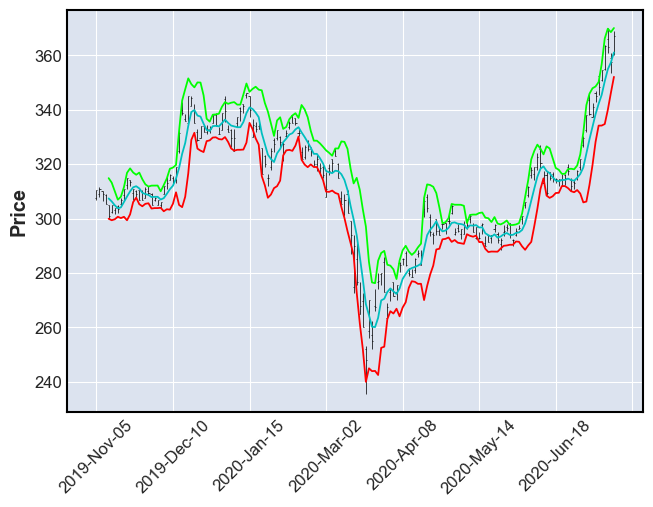

In [16]:
# talib 範例：布林通道
# 布林通道繪圖

from talib import abstract
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

stock = pd.read_csv('pd_TEJ2330.csv', index_col = 'Date')
stock.index = pd.DatetimeIndex(stock.index)  # 轉為時間戳記索引，使用 mplfinance.plot()時需要做此設定

stock = stock.loc['2019/11/05':,:]   # 取2019/11/05之後的資料

# abstract 需要的 columns 的名稱需要修改
stock2 = stock.copy()
stock2.columns = ['open', 'high', 'low', 'close', 'volume']    
a = abstract.BBANDS(stock2)

upper =a['upperband']
middle =a['middleband']
lower = a['lowerband']

apds = [mpf.make_addplot(upper,color='lime'),
        mpf.make_addplot(middle,color='c'),
        mpf.make_addplot(lower,color='r'),
       ]

mpf.plot(stock2, addplot=apds)    # 繪製股價圖

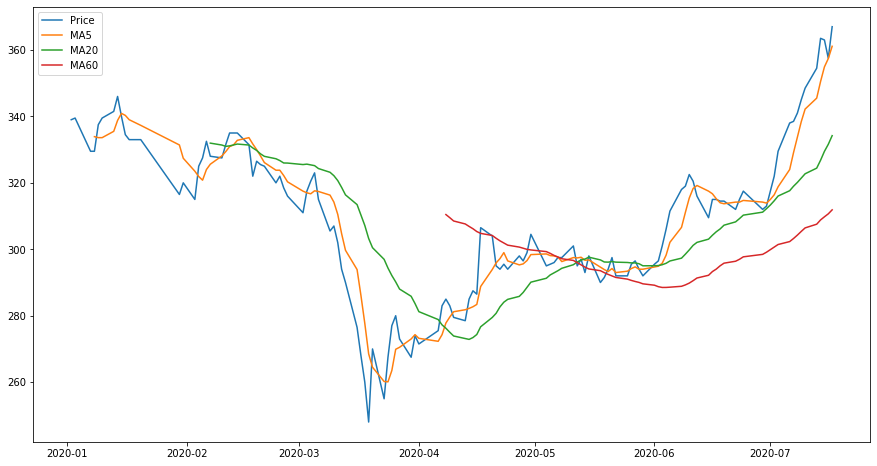

In [341]:
# 繪出股價的日線、5日線（SMA5)、月線(SMA20)、季線(SMA60)

import matplotlib.pyplot as plt
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')

MA5 = abstract.SMA(stock, timeperiod = 5)      # SMA5
MA20 = abstract.SMA(stock, timeperiod = 20)    # SMA20
MA60 = abstract.SMA(stock, timeperiod = 60)    # SMA60
price = [dt for dt in stock['close']]
date =  [dt for dt in stock['date']]

plt.figure(figsize = (15,8)) # 設定圖形大小
plt.plot(date, price, label = 'Price')
plt.plot(date, MA5, label = 'MA5')
plt.plot(date, MA20, label = 'MA20')
plt.plot(date, MA60, label = 'MA60')
plt.legend()
plt.show()

## 布林通道

In [5]:
# test 
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)
# print(upper)
# print(middle)
# print(lower)

# print(upper[:10])
print(stock)

AttributeError: 'str' object has no attribute 'year'

In [342]:
from talib import abstract

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)
print(upper)
print(middle)
print(lower)

print(upper[:10])

[         nan          nan          nan          nan 342.83084542
 341.9042158  341.9042158  345.61928851 349.67382178 346.60613705
 347.69188745 348.48683298 347.41137973 347.16578574 342.54463601
 339.3492902  334.95986217 330.40416576 336.08304597 337.25160933
 332.97442304 333.70813185 336.53560112 337.89307323 338.75315043
 337.02928564 341.77174265 340.13903348 337.29565115 332.27737808
 328.64148737 328.64148737 327.66260011 326.41882342 325.08946638
 324.183314   323.10624695 325.78290902 325.77615664 328.37642331
 328.20856881 325.62613632 318.3762568  312.93026833 314.9751038
 310.5981632  303.40291812 297.05170748 284.07549489 276.51686244
 276.22947612 284.53330692 287.34018349 288.11817244 283.01998004
 282.68093074 281.31418511 277.76260011 284.54890238 288.31855503
 289.98075142 287.91118469 286.64148737 287.66260011 289.41118469
 290.78647413 307.57871135 312.56976165 312.33654465 311.68585517
 309.37304198 304.08946638 298.23938769 298.65941171 300.14400903
 305.368500

In [1]:
# 取出布林通道的上下界和MA

from talib import abstract
import matplotlib.pyplot as plt

stock = GetStock_dic2000('data/TEJ2330.csv')
upper, middle, lower = abstract.BBANDS(stock)   # 取出布林通道的上下界和MA
print(upper)

date = [line[0] for line in SData]
price = [line[4] for line in SData]

plt.plot(date, middle)
plt.plot(date, upper)
plt.plot(date, lower)
plt.plot(date, price)
plt.show()


NameError: name 'GetStock_dic2000' is not defined

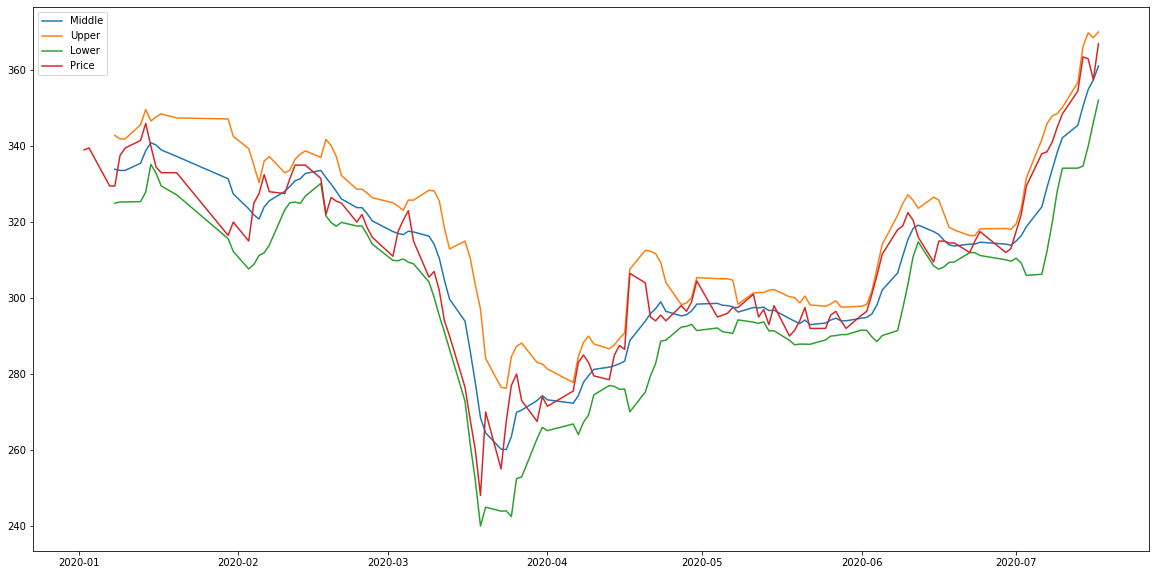

In [303]:
# 同上一程式，加上圖例

from talib import abstract
import matplotlib.pyplot as plt

upper, middle, lower = abstract.BBANDS(TAKBar)

date = [line[0] for line in SData]
price = [line[4] for line in SData]

plt.figure(figsize = (20,10)) # 設定圖形大小
plt.plot(date, middle, label="Middle")
plt.plot(date, upper, label="Upper")
plt.plot(date, lower, label="Lower")
plt.plot(date, price, label="Price")
plt.legend()    #圖例位置以預設方式呈現
plt.show()


In [141]:
# 計算移動平均值MA
# 使用自己計算和呼叫talib的MA函式等兩種方式

from talib.abstract import *
import numpy as np

price = [float(i) for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
#     print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)

print(MA)

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

TAKBar = {}
TAKBar['close'] = np.array(price)

from talib.abstract import *
MAvalue = MA(TAKBar, timeperiod = 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為30日
print(MAvalue)

MAvalue2 = MA(TAKBar['close'], timeperiod = 5)    # 傳入一個float型別的list到 MA函式
print(MAvalue2)
print(type(TAKBar['close']))


[1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
<class 'numpy.ndarray'>


In [208]:
# 計算移動平均值MA (使用傳入的參數為一list)
# 使用自己計算和呼叫talib的MA函式等兩種方式

import talib
import numpy as np

price = [float(i) for i in range(1, 20)]
MA = []
MAarray = []
MAlen = 5
for i in price:
    if len(MAarray) < MAlen:
        MAarray += [i]
    else:
        MAarray = MAarray[1:] + [i]
#     print('近五個數字:', MAarray)
    MAvalue = float(sum(MAarray) / len(MAarray))
    MA.append(MAvalue)

print(MA)

SData = GetStock('data/TEJ2330.csv')

SData = [line for line in SData if str(line[0].year) == '2020']  # 只取2020年的資料

TAKBar = {}
TAKBar['close'] = np.array(price)

# MAvalue = talib.MA(TAKBar, timeperiod = 5)    # timeperiod 為日（月，或年）數的移動平均數，預設為30日
# print(MAvalue)

MAvalue2 = talib.MA(TAKBar['close'], timeperiod = 5)    # 傳入一個float型別的list到 MA函式
print(MAvalue2)
print(type(TAKBar['close']))

[1.0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]
[nan nan nan nan  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.
 17.]
<class 'numpy.ndarray'>


In [152]:
# 列出talib 所有的 Function API 

import talib

all_ta_groups = talib.get_function_groups()
# print(all_ta_groups)
for keys, indexs in all_ta_groups.items():
    print("keys:", keys)
    for index in indexs:
        print('\tindex:', index)
        

keys: Cycle Indicators
	index: HT_DCPERIOD
	index: HT_DCPHASE
	index: HT_PHASOR
	index: HT_SINE
	index: HT_TRENDMODE
keys: Math Operators
	index: ADD
	index: DIV
	index: MAX
	index: MAXINDEX
	index: MIN
	index: MININDEX
	index: MINMAX
	index: MINMAXINDEX
	index: MULT
	index: SUB
	index: SUM
keys: Math Transform
	index: ACOS
	index: ASIN
	index: ATAN
	index: CEIL
	index: COS
	index: COSH
	index: EXP
	index: FLOOR
	index: LN
	index: LOG10
	index: SIN
	index: SINH
	index: SQRT
	index: TAN
	index: TANH
keys: Momentum Indicators
	index: ADX
	index: ADXR
	index: APO
	index: AROON
	index: AROONOSC
	index: BOP
	index: CCI
	index: CMO
	index: DX
	index: MACD
	index: MACDEXT
	index: MACDFIX
	index: MFI
	index: MINUS_DI
	index: MINUS_DM
	index: MOM
	index: PLUS_DI
	index: PLUS_DM
	index: PPO
	index: ROC
	index: ROCP
	index: ROCR
	index: ROCR100
	index: RSI
	index: STOCH
	index: STOCHF
	index: STOCHRSI
	index: TRIX
	index: ULTOSC
	index: WILLR
keys: Overlap Studies
	index: BBANDS
	index: DEMA
	ind

In [155]:
import talib
import pandas as pd
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
print(table)

                技術指標類別名稱  該類別指標總數
0       Cycle Indicators        5
1         Math Operators       11
2         Math Transform       15
3    Momentum Indicators       30
4        Overlap Studies       17
5    Pattern Recognition       61
6        Price Transform        4
7    Statistic Functions        9
8  Volatility Indicators        3
9      Volume Indicators        3


In [ ]:
import talib
import pandas as pd
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
print(table)

In [156]:
# talib 的
from talib import abstract

all_ta_groups = abstract.get_function_groups()
# print(all_ta_groups)
for keys, indexs in all_ta_groups.items():
    print("keys:", keys)
    for index in indexs:
        print('\tindex:', index)
        

AttributeError: module 'talib.abstract' has no attribute 'get_function_groups'

## 參考函式如何使用

In [212]:
# 列出talib 中函式的參數、輸入與輸出的值

from talib import abstract
print(abstract.MA)
print()
print(abstract.BBANDS)

MA([input_arrays], [timeperiod=5], [matype=0])

Moving average (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 5
    matype: 0 (Simple Moving Average)
Outputs:
    real

BBANDS([input_arrays], [timeperiod=5], [nbdevup=2], [nbdevdn=2], [matype=0])

Bollinger Bands (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 5
    nbdevup: 2
    nbdevdn: 2
    matype: 0 (Simple Moving Average)
Outputs:
    upperband
    middleband
    lowerband


In [ ]:
# https://markjong001.pixnet.net/blog/post/249471859-python-%E9%87%8F%E5%8C%96%E5%88%86%E6%9E%90%E7%9A%84%E5%A5%BD%E5%88%A9%E5%99%A8-%22ta-lib%22

SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)     ## STOCH是 KD 線

plot_candles(
             start_time='2017-01-01',      ## 開始時間
             end_time='2018-01-01',       ## 結束時間
             pricing=df,                            ## dataframe 只吃 ['open_price', 'close_price', 'high', 'low', 'volume']
             title='Candles',                      ## 名稱而已
             volume_bars=True,               ## 畫不畫 量圖
             overlays=[SMA],                    ##  跟股價圖 疊起來的是什麼指標
             technicals = [RSI, STOCH],    ## 其他圖要畫甚麼
             technicals_titles=['RSI', 'KD'] ## 其他圖的名稱
            )